# **ANAVA UGM DATAVERS 2025**

## **IMPORT LIBRARY**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **READ THE DATASET**

In [2]:
train_data = pd.read_csv("/kaggle/input/penyisihan-data-vers-anava-19/train.csv")
train_data.head(5)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,ID_Transaction,temperature_10H_max (°C),temperature_10H_min (°C),temperature-1,temperature-2,temperature-3,apparent_temperature_max,apparent_temperature_min,ID_Area,Machine,...,RPM,RPM-1,RPM-2,RPM-3,Vibration-1,Vibration-2,Power,Power_Backup,Status,Breakdown Category
0,TRXc8f4c2dcbfe501093501015b32bd0ba2,1110.970519,NaN,106.145582,38.779147,262.330188,33.916720,NaN,ID12,A.4,...,2666.124927,2956.904780,4779.579998,3681.056129,19.624641,40.938353,NaN,Yes,Warning,NaN
1,TRXe9e6c37fc1281efd6c5ba52fce259584,608.487665,19.932166,375.386134,17.736401,45.051041,4.542451,-21.991755,ID37,K.3,...,2907.253211,2773.384487,4282.046671,4527.123292,28.167360,NaN,311.803841,Yes,Normal,NaN
2,TRXcaef103041dfe1b84537bc3dbdbc6567,462.826917,3.185101,117.322749,22.256591,0.165788,8.695319,-31.803539,ID24,J.1,...,3215.057495,3072.879720,4180.407796,4841.741619,29.843080,46.980726,1257.681079,No,Normal,NaN
3,TRX06f9e5574a639bcedb7ec8c3cb9fbaa4,710.093309,26.190643,294.871314,30.639358,140.984886,18.843502,-39.872275,ID7,J.4,...,4361.849341,3295.409873,3337.288244,3877.348905,28.720636,54.860603,478.325694,No,Breakdown,Unplanned Downtime
4,TRXd8f3a5ce90d25127ba3240a12eb9c140,410.114364,9.664961,185.267516,28.154454,57.002150,23.915704,NaN,ID41,J.2,...,4817.893609,3084.624619,NaN,2501.387065,26.907301,NaN,674.159077,Yes,Breakdown,Unplanned Downtime


Sampling sebanyak 10%

In [3]:
train = train_data.sample(frac=0.1, random_state=42)

In [4]:
train.shape

(1300000, 28)

## **PREPROCESSING**

In [5]:
#check missing value
train.isnull().sum()

ID_Transaction                   0
temperature_10H_max (°C)     37232
temperature_10H_min (°C)    249582
temperature-1                37931
temperature-2               150732
temperature-3                46824
apparent_temperature_max    277129
apparent_temperature_min    261631
ID_Area                     224924
Machine                     219028
timestamp                        0
humidity                    253609
Voltage-L                   125290
Voltage-R                    89885
Voltage-M                    44859
Current-M                    14027
Current-R                    18458
Current-T                   295670
RPM                         143664
RPM-1                       174857
RPM-2                       244272
RPM-3                       236369
Vibration-1                  69153
Vibration-2                 196934
Power                       170464
Power_Backup                 44084
Status                           0
Breakdown Category          959579
dtype: int64

In [6]:
train['Status'].value_counts()

Status
Normal       799722
Warning      254379
Breakdown    245899
Name: count, dtype: int64

In [7]:
train.shape

(1300000, 28)

In [8]:
## drop the columns that have missing value more than 60%
train = train.drop(columns =['Breakdown Category'])

In [9]:
train.head(5)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,ID_Transaction,temperature_10H_max (°C),temperature_10H_min (°C),temperature-1,temperature-2,temperature-3,apparent_temperature_max,apparent_temperature_min,ID_Area,Machine,...,Current-T,RPM,RPM-1,RPM-2,RPM-3,Vibration-1,Vibration-2,Power,Power_Backup,Status
996418,TRX467abb70bec245ba5fa1eb013a6c83a8,583.998084,19.204105,366.920389,12.515295,33.821707,32.992379,-74.679361,ID25,G.3,...,41.413634,3576.733629,4823.485468,2690.015710,3164.598634,19.612053,57.330527,1274.780992,No,Normal
142167,TRX609de313c5e3498cc699d9fe5c7e3629,239.390525,-285.974970,353.641901,32.944366,59.907899,50.282743,-57.776457,ID31,NaN,...,50.839454,5028.411121,2594.931675,NaN,NaN,27.590864,54.850591,646.233877,No,Warning
12432441,TRX61e7dca427084207f30920936a951aac,-5796.678436,NaN,127.379078,23.880361,71.981375,46.819821,-9.742353,ID25,J.4,...,39.176262,3036.855179,4402.314594,2635.513822,2428.749889,28.012554,42.231663,535.577796,No,Normal
7704554,TRXd332d6d4654188b529542adb6c05f09e,579.419115,17.847970,347.851984,43.043091,100.543731,37.962151,-54.002818,ID40,G.4,...,53.846585,4178.761026,3026.011328,2414.190435,3844.101439,26.727351,NaN,273.061020,No,Warning
2711670,TRX72301d2ad3ade8e4e0b15465eec07f9e,NaN,12.249597,282.495980,14.492849,27.399695,14.941042,-19.555155,ID39,F.2,...,40.850566,NaN,2745.100847,3884.040406,3495.841709,28.571767,40.655364,NaN,Yes,Normal


In [10]:
threshold = 50 / 100 * 1300000
print(threshold)

650000.0


In [11]:
missing = train.isnull().sum()

over = missing[missing >=  6500000].index

In [12]:
print(over)

Index([], dtype='object')


In [13]:
numeric = train.select_dtypes(include =['number']).columns
categorical = train.select_dtypes(exclude =['number']).columns

In [14]:
from scipy.stats import zscore

z_scores = zscore(train[numeric])
outliers = train[abs(z_scores) > 3]

print(outliers)


         ID_Transaction  temperature_10H_max (°C)  temperature_10H_min (°C)  \
996418              NaN                       NaN                       NaN   
142167              NaN                       NaN                       NaN   
12432441            NaN                       NaN                       NaN   
7704554             NaN                       NaN                       NaN   
2711670             NaN                       NaN                       NaN   
...                 ...                       ...                       ...   
688391              NaN                       NaN                       NaN   
9403565             NaN                       NaN                       NaN   
496094              NaN                       NaN                       NaN   
799283              NaN                       NaN                       NaN   
9876747             NaN                       NaN                       NaN   

          temperature-1  temperature-2  temperature

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [15]:
# Menghitung z-score untuk kolom numerik
z_scores = train[numeric].apply(zscore)

# Menentukan outliers berdasarkan z-score > 3 atau < -3
outliers = (abs(z_scores) > 3)

# Menandai baris dengan outliers
train_outliers = train[outliers.any(axis=1)]

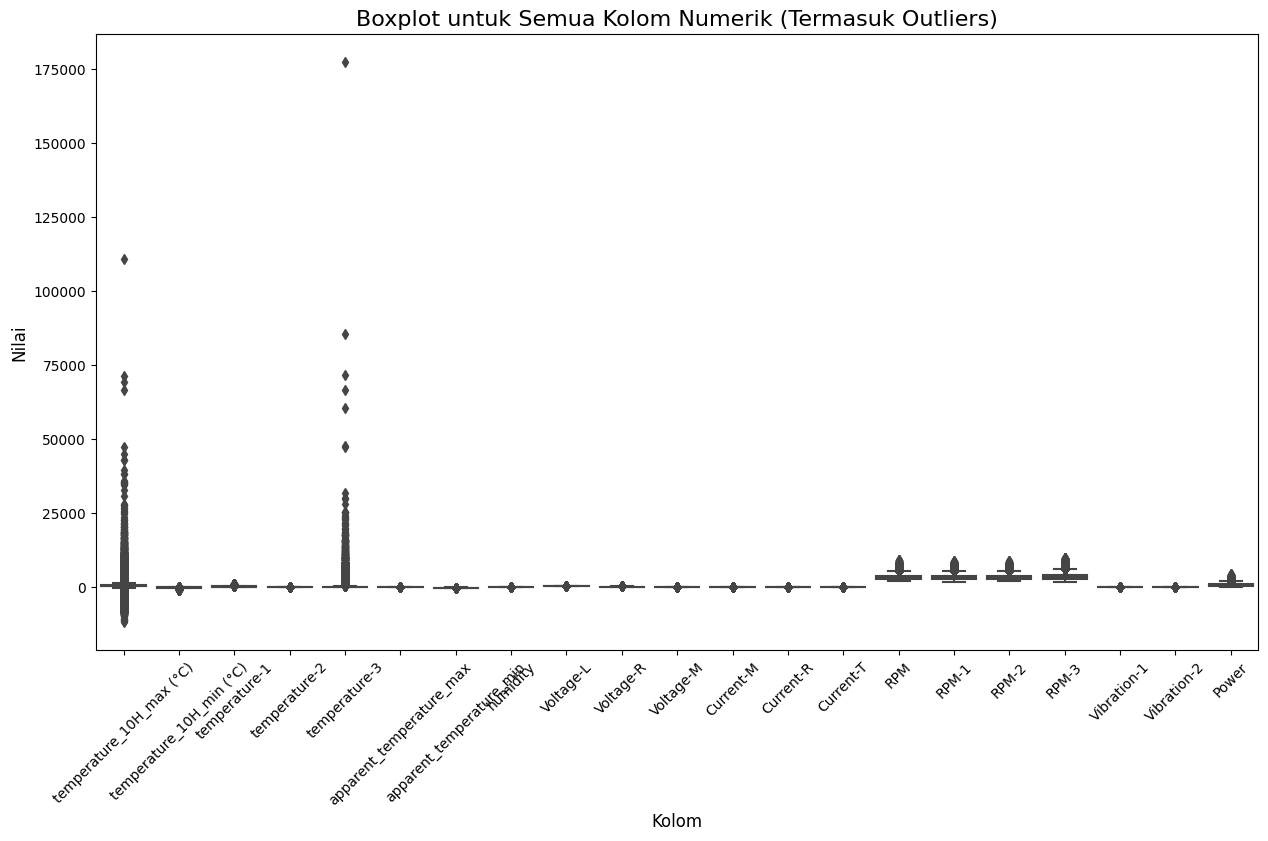

Outliers Ditemukan:
Empty DataFrame
Columns: [ID_Transaction, temperature_10H_max (°C), temperature_10H_min (°C), temperature-1, temperature-2, temperature-3, apparent_temperature_max, apparent_temperature_min, ID_Area, Machine, timestamp, humidity, Voltage-L, Voltage-R, Voltage-M, Current-M, Current-R, Current-T, RPM, RPM-1, RPM-2, RPM-3, Vibration-1, Vibration-2, Power, Power_Backup, Status]
Index: []

[0 rows x 27 columns]


In [16]:
# Visualisasi boxplot
plt.figure(figsize=(15, 8))
sns.boxplot(data=train[numeric])

# Menambahkan judul dan label
plt.title("Boxplot untuk Semua Kolom Numerik (Termasuk Outliers)", fontsize=16)
plt.xticks(rotation=45)
plt.xlabel("Kolom", fontsize=12)
plt.ylabel("Nilai", fontsize=12)

# Menampilkan grafik
plt.show()

# Menampilkan DataFrame dengan outliers
print("Outliers Ditemukan:")
print(train_outliers)

In [17]:
for column in categorical:
    train[column]=train[column].fillna(train[column].mode()[0])

In [18]:
train.isnull().sum()

ID_Transaction                   0
temperature_10H_max (°C)     37232
temperature_10H_min (°C)    249582
temperature-1                37931
temperature-2               150732
temperature-3                46824
apparent_temperature_max    277129
apparent_temperature_min    261631
ID_Area                          0
Machine                          0
timestamp                        0
humidity                    253609
Voltage-L                   125290
Voltage-R                    89885
Voltage-M                    44859
Current-M                    14027
Current-R                    18458
Current-T                   295670
RPM                         143664
RPM-1                       174857
RPM-2                       244272
RPM-3                       236369
Vibration-1                  69153
Vibration-2                 196934
Power                       170464
Power_Backup                     0
Status                           0
dtype: int64

In [19]:
train[numeric]=train[numeric].astype('float32')

In [20]:
train.dtypes

ID_Transaction               object
temperature_10H_max (°C)    float32
temperature_10H_min (°C)    float32
temperature-1               float32
temperature-2               float32
temperature-3               float32
apparent_temperature_max    float32
apparent_temperature_min    float32
ID_Area                      object
Machine                      object
timestamp                    object
humidity                    float32
Voltage-L                   float32
Voltage-R                   float32
Voltage-M                   float32
Current-M                   float32
Current-R                   float32
Current-T                   float32
RPM                         float32
RPM-1                       float32
RPM-2                       float32
RPM-3                       float32
Vibration-1                 float32
Vibration-2                 float32
Power                       float32
Power_Backup                 object
Status                       object
dtype: object

check duplicated data

In [21]:
train.duplicated().sum()

0

check outlier

In [22]:
n_cols = 3  # Jumlah kolom dalam grid
n_rows = int(np.ceil(len(numeric) / n_cols))  # Menghitung jumlah baris

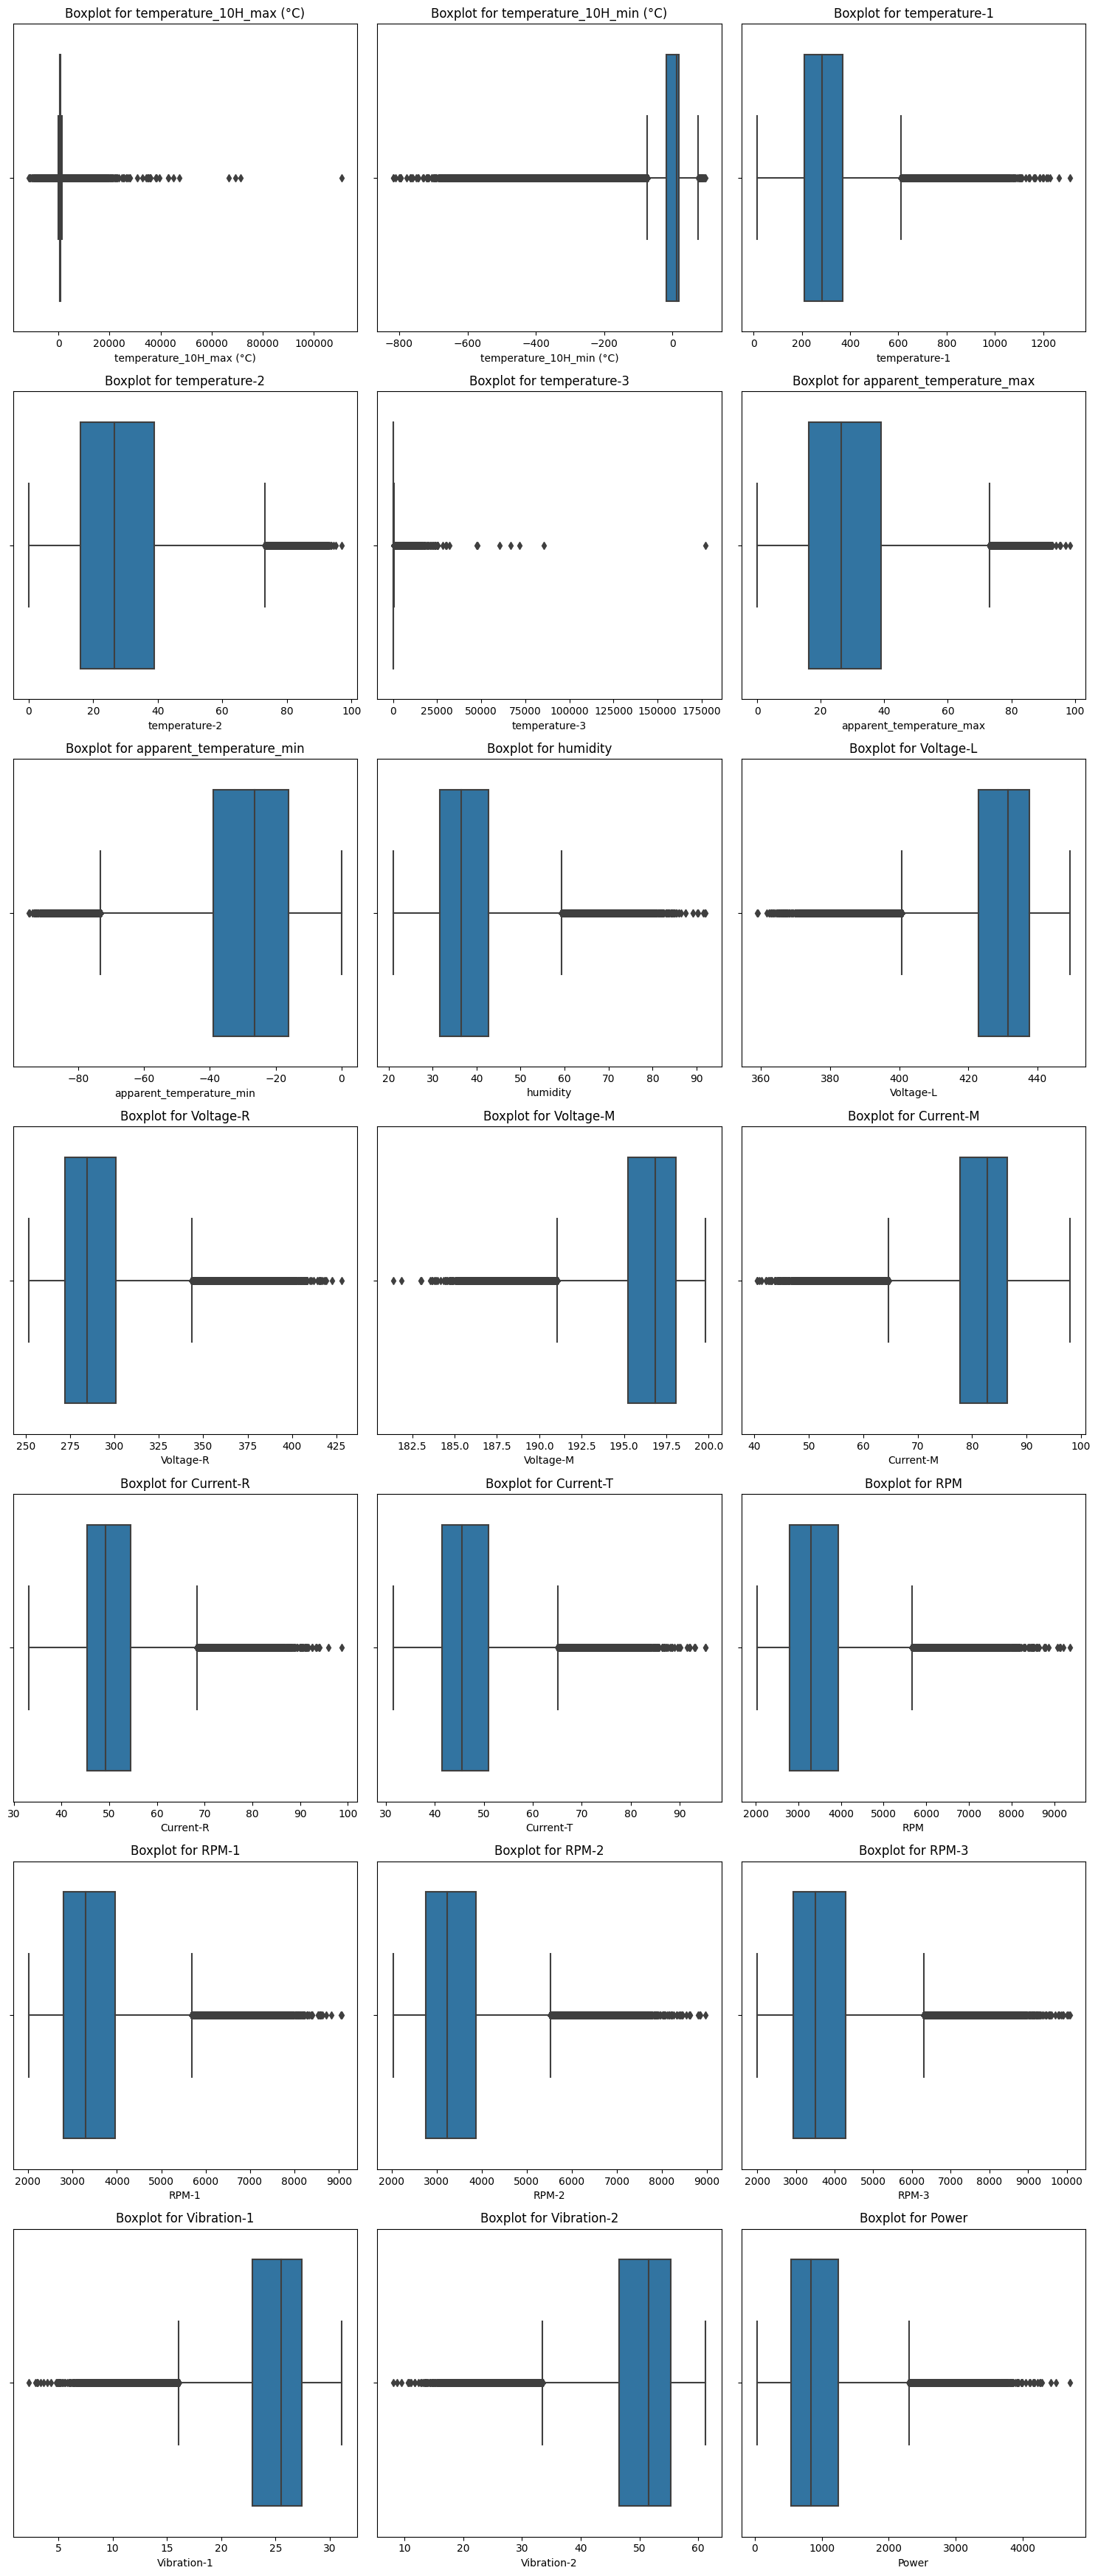

In [23]:
# Membuat ukuran figure agar cukup besar untuk menampilkan semua boxplot
plt.figure(figsize=(n_cols * 5, n_rows * 5))

# Membuat boxplot untuk setiap kolom numerik
for i, col in enumerate(numeric, 1):
    plt.subplot(n_rows, n_cols, i)  # Menyesuaikan jumlah baris dan kolom
    sns.boxplot(data=train[numeric], x=col)
    plt.title(f'Boxplot for {col}')

# Menyesuaikan tata letak agar tidak overlap
plt.tight_layout()

# Tampilkan plot
plt.show()

CLIPPING OUTLIERS

In [24]:
lower_bound = train[numeric].quantile(0.05)
upper_bound = train[numeric].quantile(0.95)

In [25]:
for column in numeric:
    train[column]=train[column].clip(lower=lower_bound[column],upper=upper_bound[column])

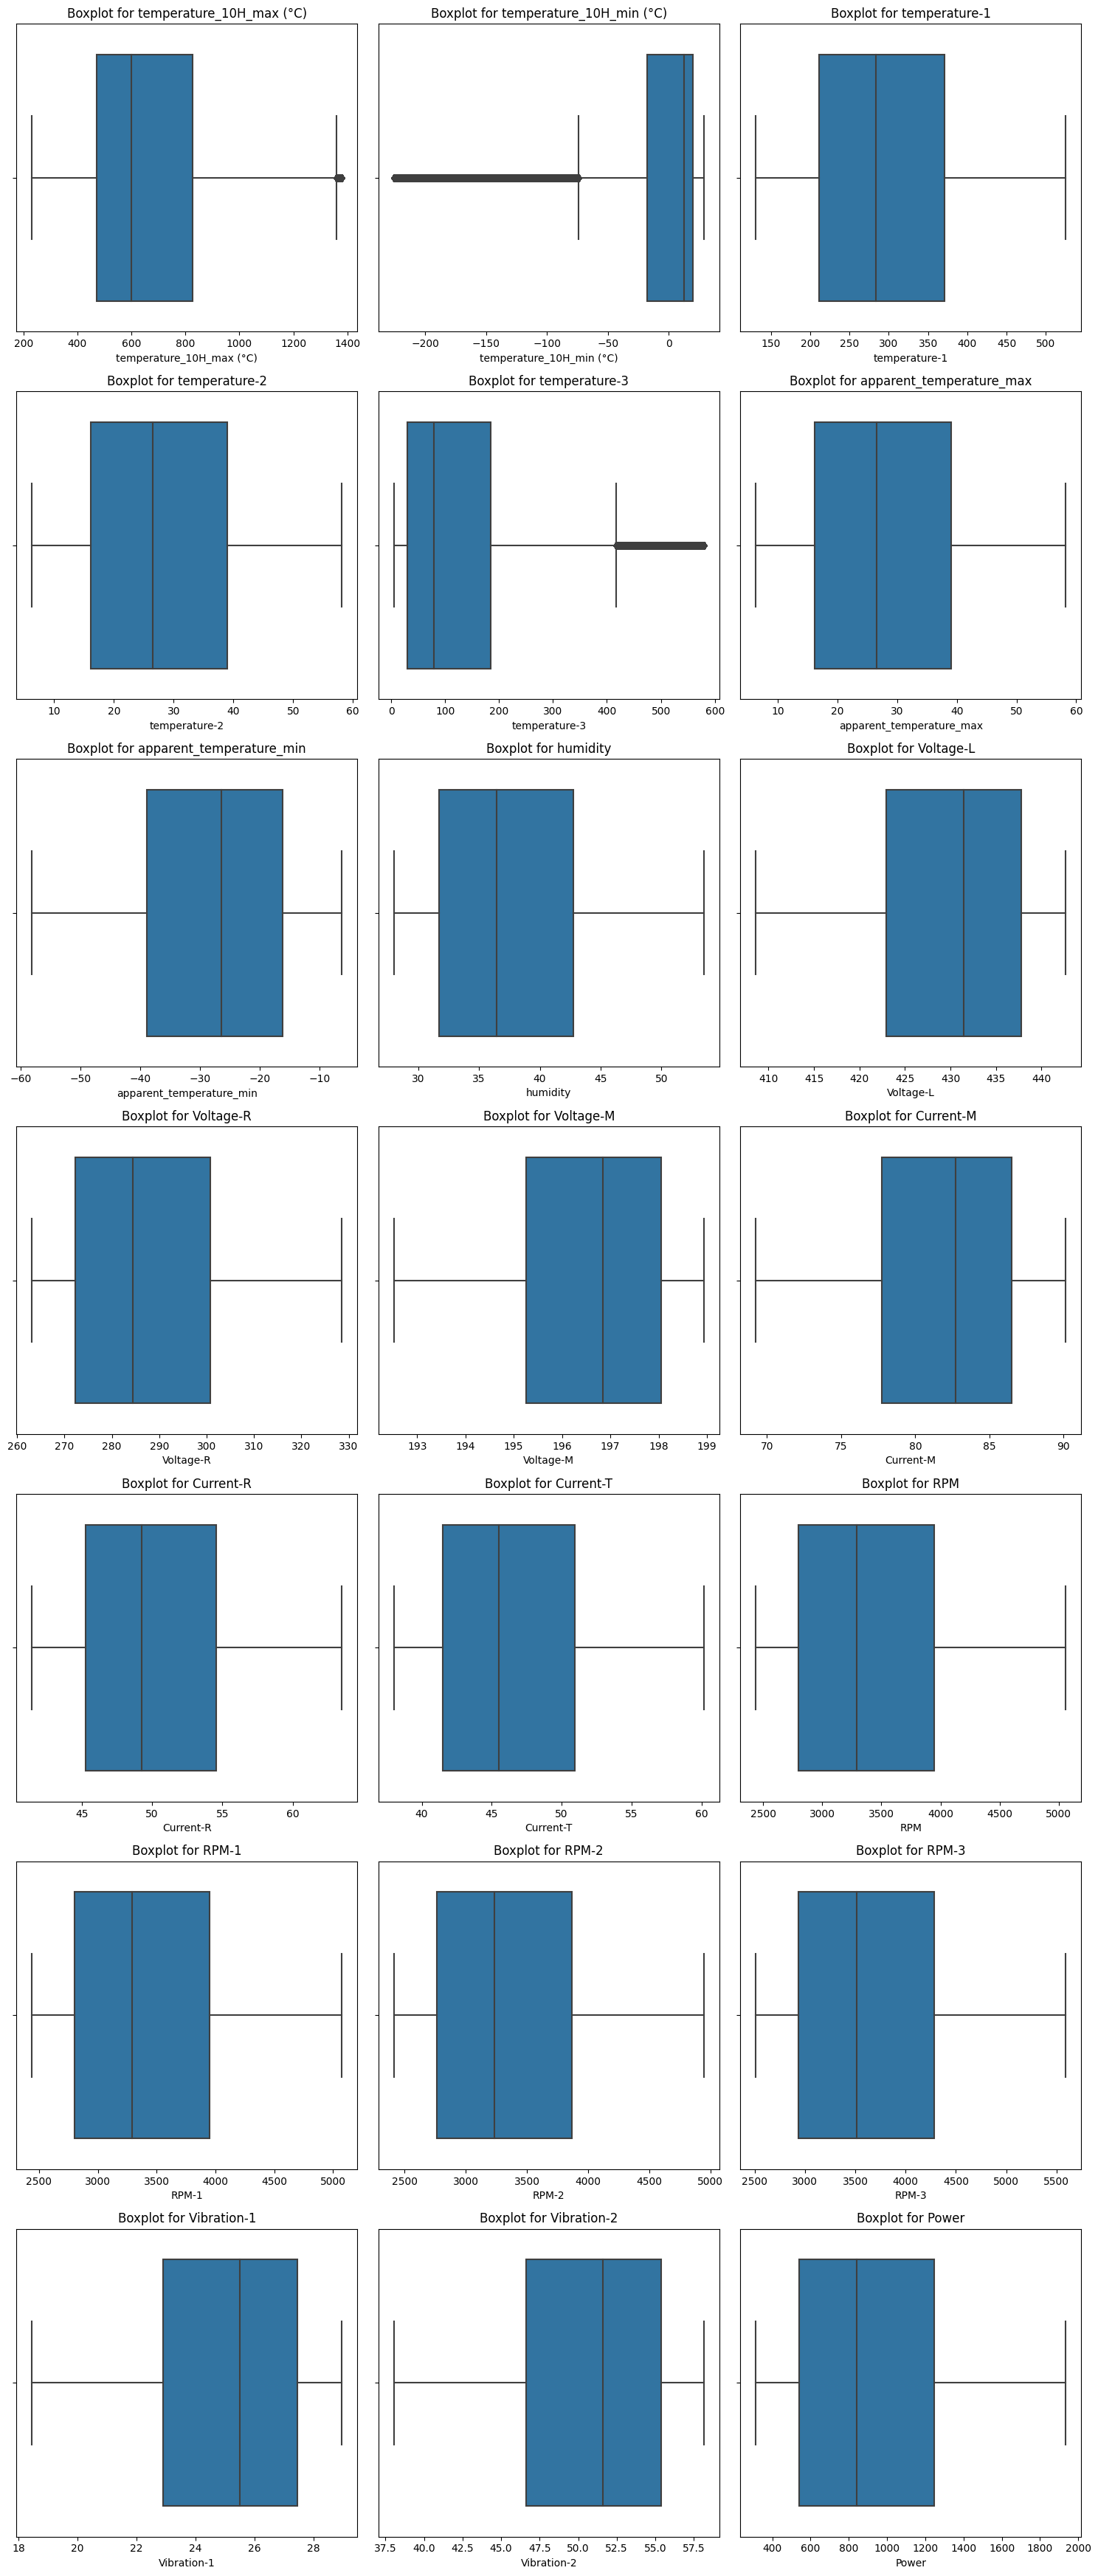

In [26]:
# Membuat ukuran figure agar cukup besar untuk menampilkan semua boxplot
plt.figure(figsize=(n_cols * 5, n_rows * 5))

# Membuat boxplot untuk setiap kolom numerik
for i, col in enumerate(numeric, 1):
    plt.subplot(n_rows, n_cols, i)  # Menyesuaikan jumlah baris dan kolom
    sns.boxplot(data=train[numeric], x=col)
    plt.title(f'Boxplot for {col}')

# Menyesuaikan tata letak agar tidak overlap
plt.tight_layout()

# Tampilkan plot
plt.show()

ngisi missing value

In [27]:
train[numeric] = train[numeric].fillna(train[numeric].median())

In [28]:
train.isnull().sum()

ID_Transaction              0
temperature_10H_max (°C)    0
temperature_10H_min (°C)    0
temperature-1               0
temperature-2               0
temperature-3               0
apparent_temperature_max    0
apparent_temperature_min    0
ID_Area                     0
Machine                     0
timestamp                   0
humidity                    0
Voltage-L                   0
Voltage-R                   0
Voltage-M                   0
Current-M                   0
Current-R                   0
Current-T                   0
RPM                         0
RPM-1                       0
RPM-2                       0
RPM-3                       0
Vibration-1                 0
Vibration-2                 0
Power                       0
Power_Backup                0
Status                      0
dtype: int64

In [29]:
hawbhbeahb

NameError: name 'hawbhbeahb' is not defined

TRANSFORMATION

In [30]:
from sklearn.preprocessing import PowerTransformer

# Inisialisasi Yeo-Johnson Transformer
transformer = PowerTransformer(method='yeo-johnson')

In [ ]:
median = train[numeric].median()
print(median)

In [ ]:
for col in numeric:
    lower_bound = train[col].quantile(0.05)
    upper_bound = train[col].quantile(0.95)
    median = train[col].median()
    train.loc[(train[col] < lower_bound) | (train[col] > upper_bound), col] = median


In [31]:
# Terapkan Yeo-Johnson pada semua kolom numerik
train[numeric] = transformer.fit_transform(train[numeric])

# Cek hasilnya
train.head(5)

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


,ID_Transaction,temperature_10H_max (°C),temperature_10H_min (°C),temperature-1,temperature-2,temperature-3,apparent_temperature_max,apparent_temperature_min,ID_Area,Machine,...,Current-T,RPM,RPM-1,RPM-2,RPM-3,Vibration-1,Vibration-2,Power,Power_Backup,Status
996418,TRX467abb70bec245ba5fa1eb013a6c83a8,-0.160405,0.782475,0.724070,-1.160206,-0.662016,0.475312,-1.942313,ID25,G.3,...,-0.935814,0.407836,1.670413,-1.086467,-0.518408,-1.616153,1.459441,0.894704,No,Normal
142167,TRX609de313c5e3498cc699d9fe5c7e3629,-2.181511,-1.838630,0.618640,0.453456,-0.221172,1.533434,-1.923791,ID31,D.4,...,0.893966,1.812408,-1.359099,-0.000841,0.001557,0.930496,0.783551,-0.512377,No,Warning
12432441,TRX61e7dca427084207f30920936a951aac,-2.252836,0.053734,-1.845761,-0.171987,-0.072938,1.337673,1.534230,ID25,J.4,...,-1.557298,-0.421770,1.317571,-1.218313,-1.814602,1.131206,-1.478367,-0.872583,No,Normal
7704554,TRXd332d6d4654188b529542adb6c05f09e,-0.179074,0.629842,0.571781,1.054473,0.205196,0.802352,-1.726229,ID40,G.4,...,1.297604,1.099007,-0.453251,-1.812087,0.421092,0.543351,0.030506,-1.834310,No,Warning
2711670,TRX72301d2ad3ade8e4e0b15465eec07f9e,-0.099134,0.053077,-0.000453,-0.963442,-0.816400,-0.981256,0.546464,ID39,F.2,...,-1.083008,-0.003430,-1.013470,0.912730,-0.021348,1.409587,-1.651197,0.014120,Yes,Normal


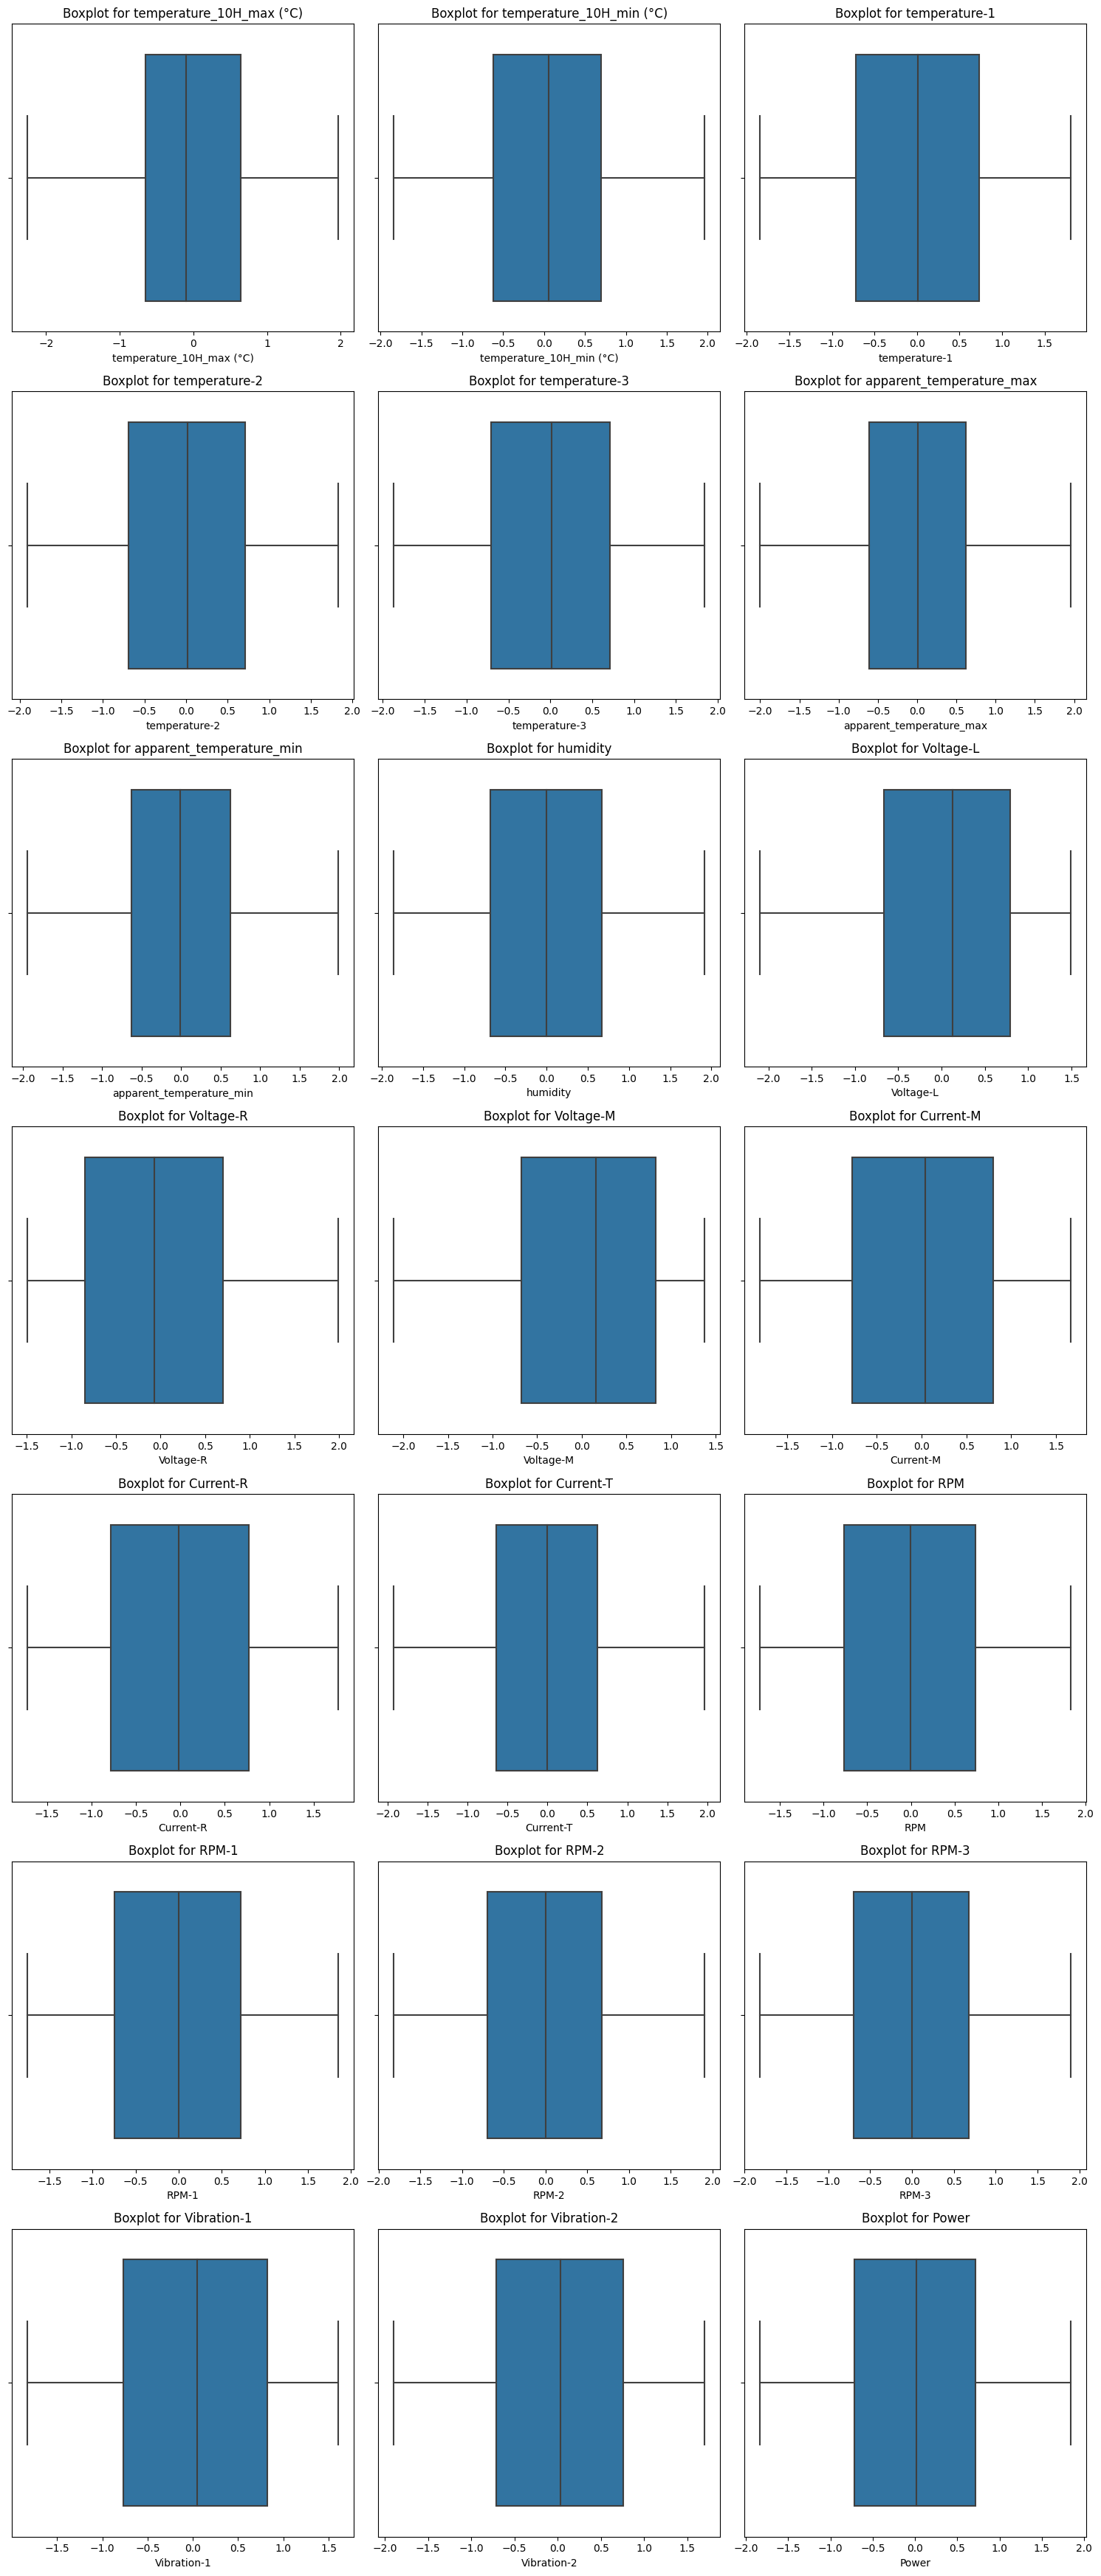

In [32]:
# Membuat ukuran figure agar cukup besar untuk menampilkan semua boxplot
plt.figure(figsize=(n_cols * 5, n_rows * 5))

# Membuat boxplot untuk setiap kolom numerik
for i, col in enumerate(numeric, 1):
    plt.subplot(n_rows, n_cols, i)  # Menyesuaikan jumlah baris dan kolom
    sns.boxplot(data=train[numeric], x=col)
    plt.title(f'Boxplot for {col}')

# Menyesuaikan tata letak agar tidak overlap
plt.tight_layout()

# Tampilkan plot
plt.show()

skalarisasi

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [35]:
train[numeric]=scaler.fit_transform(train[numeric])

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Histogram Sebelum Standardisasi')

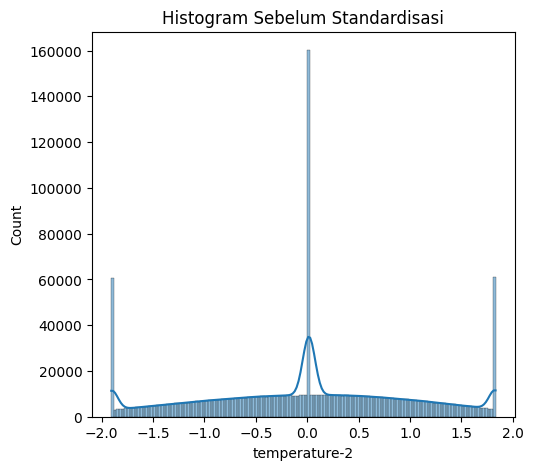

In [36]:
# Histogram Sebelum Standardisasi
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(train[numeric[3]], kde=True)
plt.title("Histogram Sebelum Standardisasi")

In [ ]:
train.head(10)

In [ ]:
train.dtypes

In [ ]:
train[['ID_Area','Machine','timestamp']]

In [37]:
train = train.drop(columns=['ID_Area','Machine','timestamp'])

ENCODING CATEGORICAL COLUMNS

In [38]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [39]:
train['Power_Backup'] = encoder.fit_transform(train['Power_Backup'])
train['Status'] = encoder.fit_transform(train['Status'])

In [ ]:
train.head(10)

In [40]:
train = train.drop(columns=['ID_Transaction'])

In [ ]:
train.head(10)

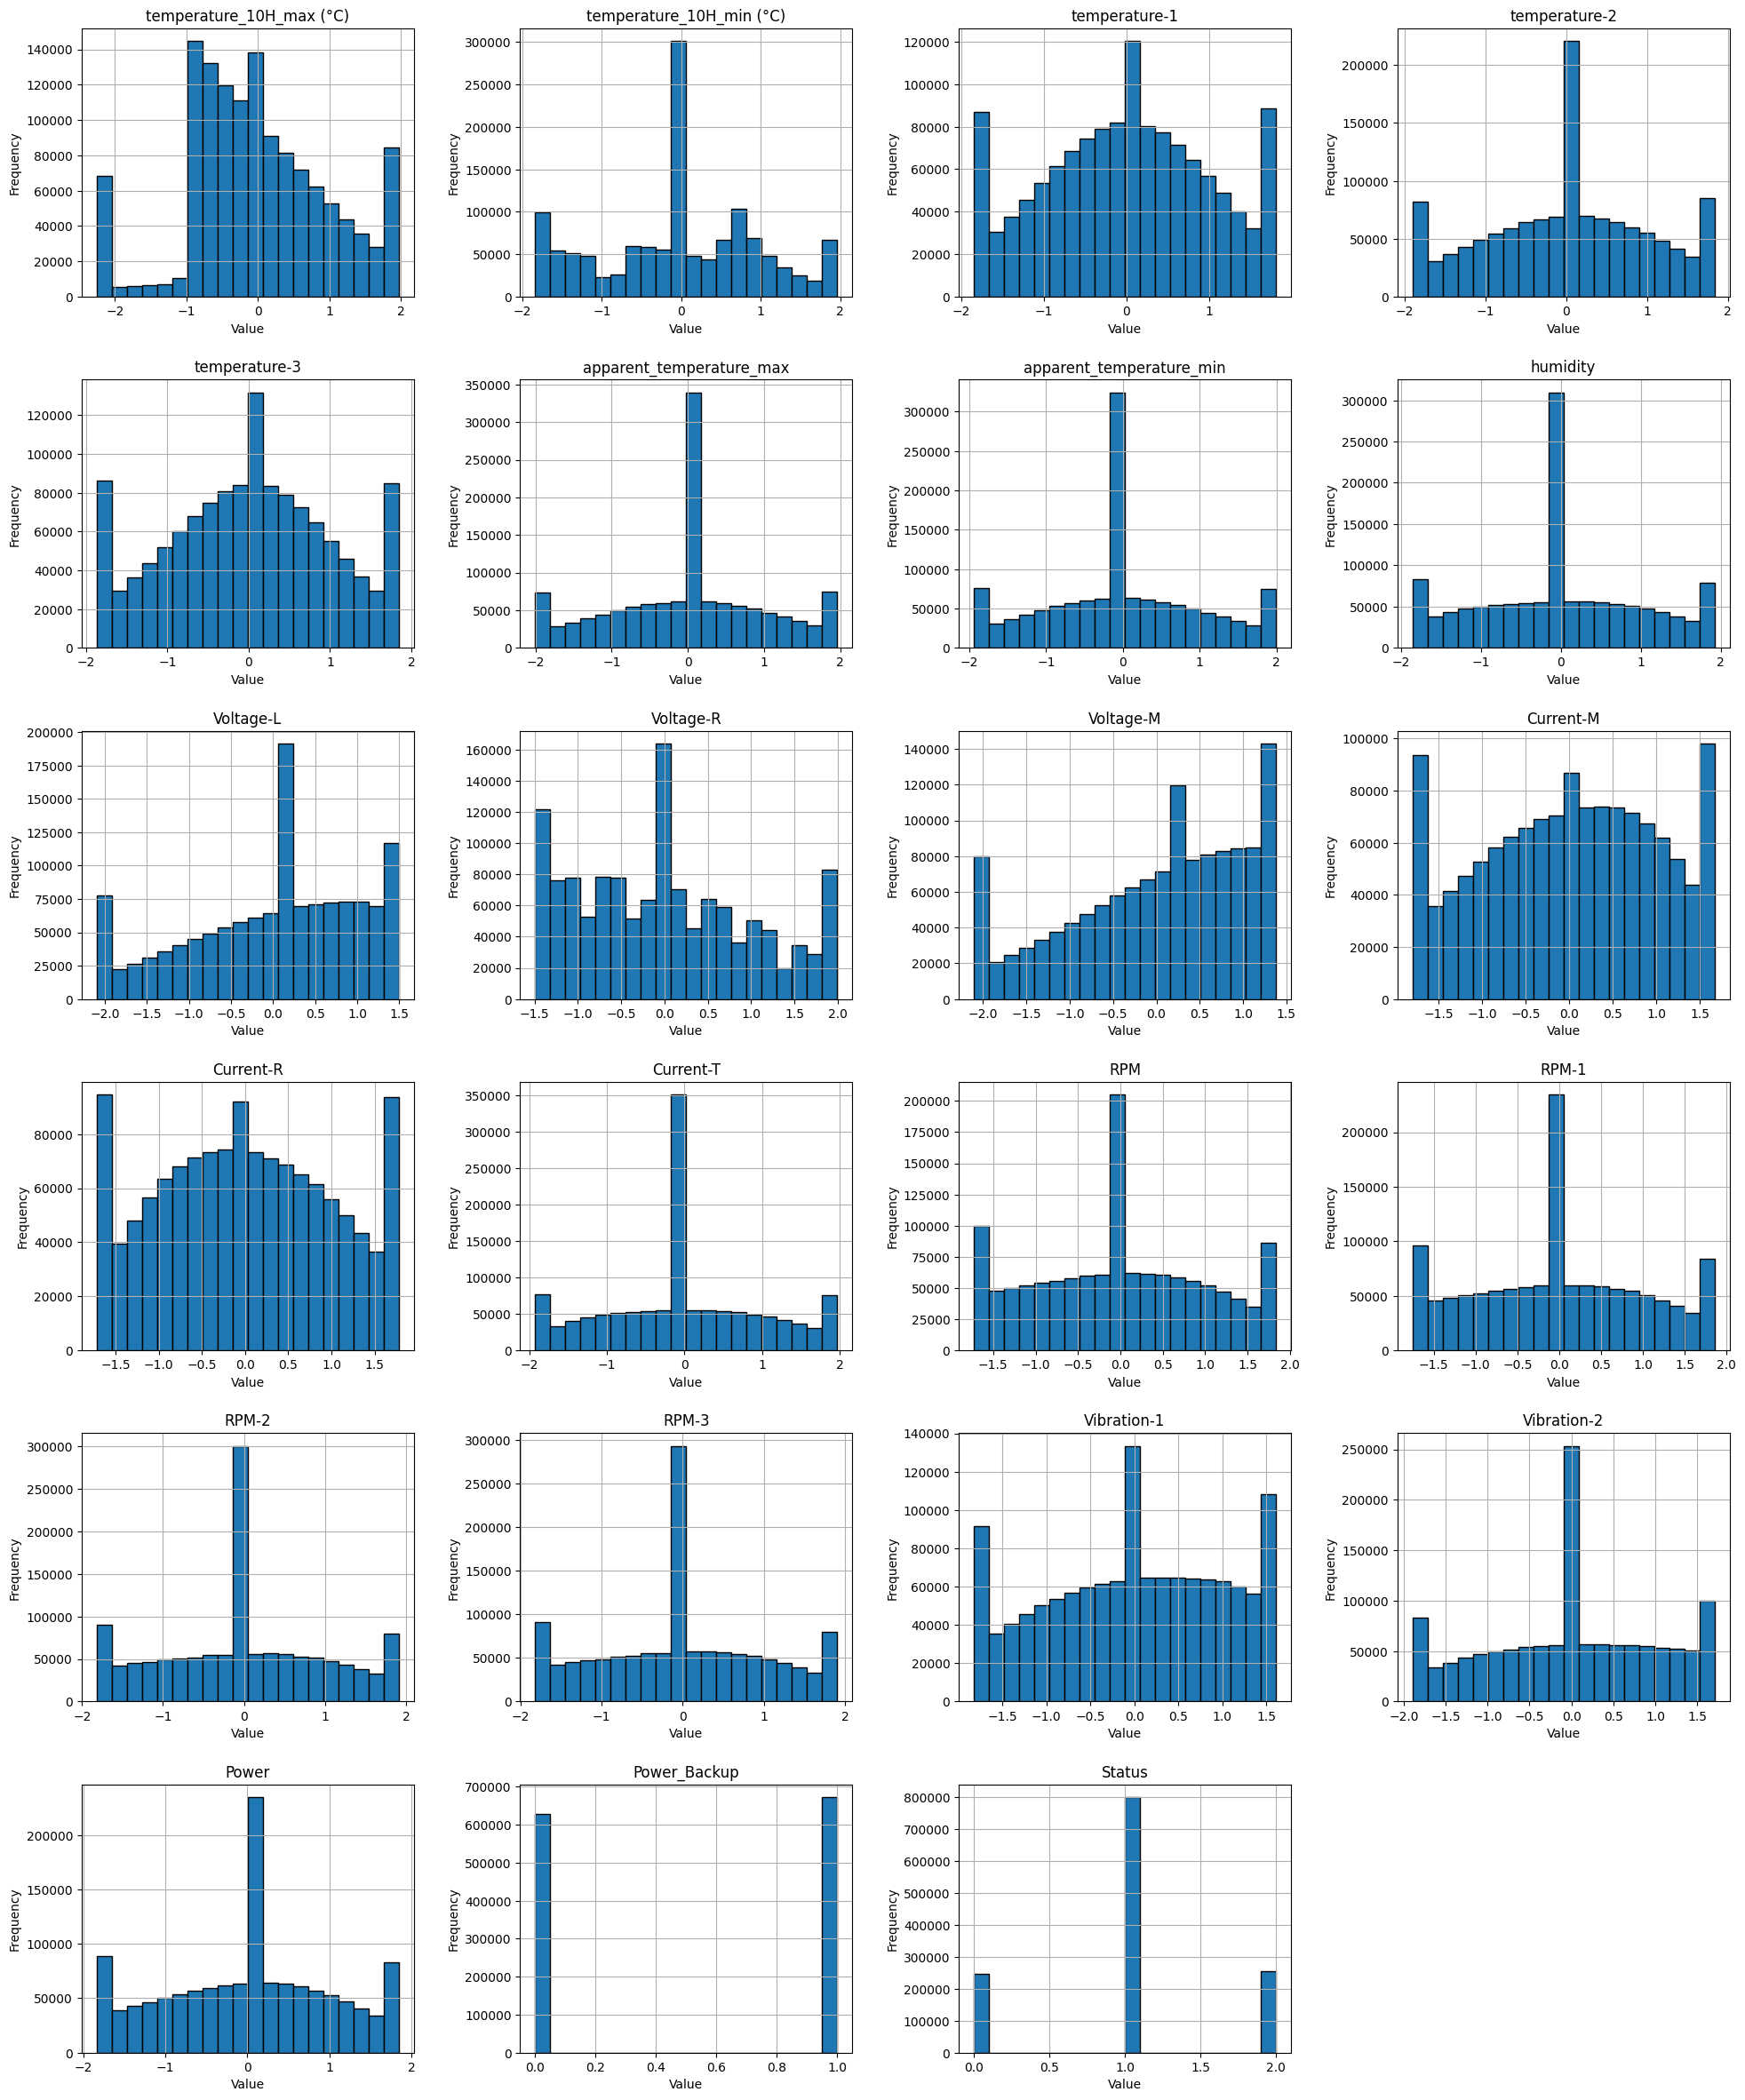

In [41]:
# Menghitung jumlah variabel
num_vars = train.shape[1]

# Menentukan jumlah baris dan kolom untuk grid subplot
n_cols = 4  # Jumlah kolom yang diinginkan
n_rows = -(-num_vars // n_cols)  # Ceiling division untuk menentukan jumlah baris

# Membuat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

# Flatten axes array untuk memudahkan iterasi jika diperlukan
axes = axes.flatten()

# Plot setiap variabel
for i, column in enumerate(train.columns):
    train[column].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Menghapus subplot yang tidak terpakai (jika ada)
for j in range(len(train.columns), len(axes)):
    fig.delaxes(axes[j])

# Menyesuaikan layout agar lebih rapi
plt.tight_layout(pad=2.0)
plt.show()

In [ ]:
# Plot distribusi untuk setiap kolom numerik
train.hist(bins=30, figsize=(12, 8))
plt.tight_layout()  # Mengatur layout agar plot tidak saling tumpang tindih
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
train[numeric]=scaler.fit_transform(train[numeric])

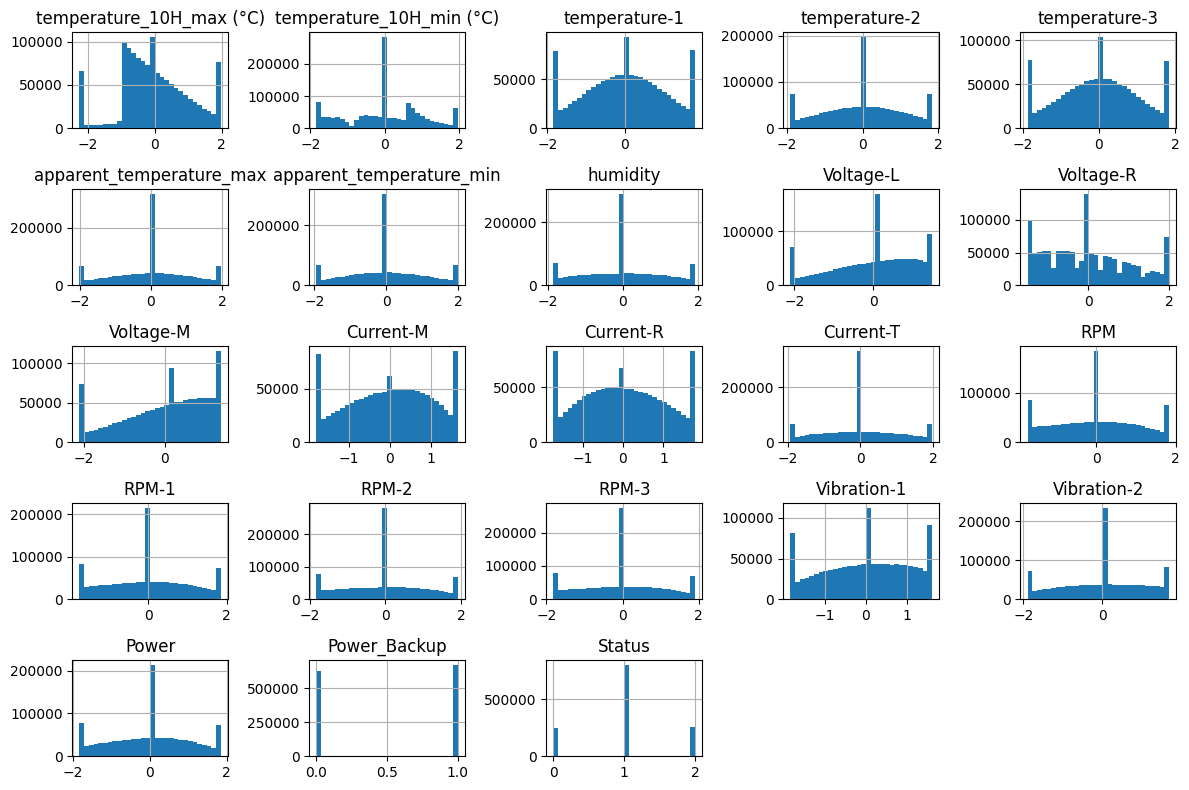

In [42]:
# Plot distribusi untuk setiap kolom numerik
train.hist(bins=30, figsize=(12, 8))
plt.tight_layout()  # Mengatur layout agar plot tidak saling tumpang tindih
plt.show()

In [ ]:
train.shape

In [ ]:
train['Status'].value_counts()

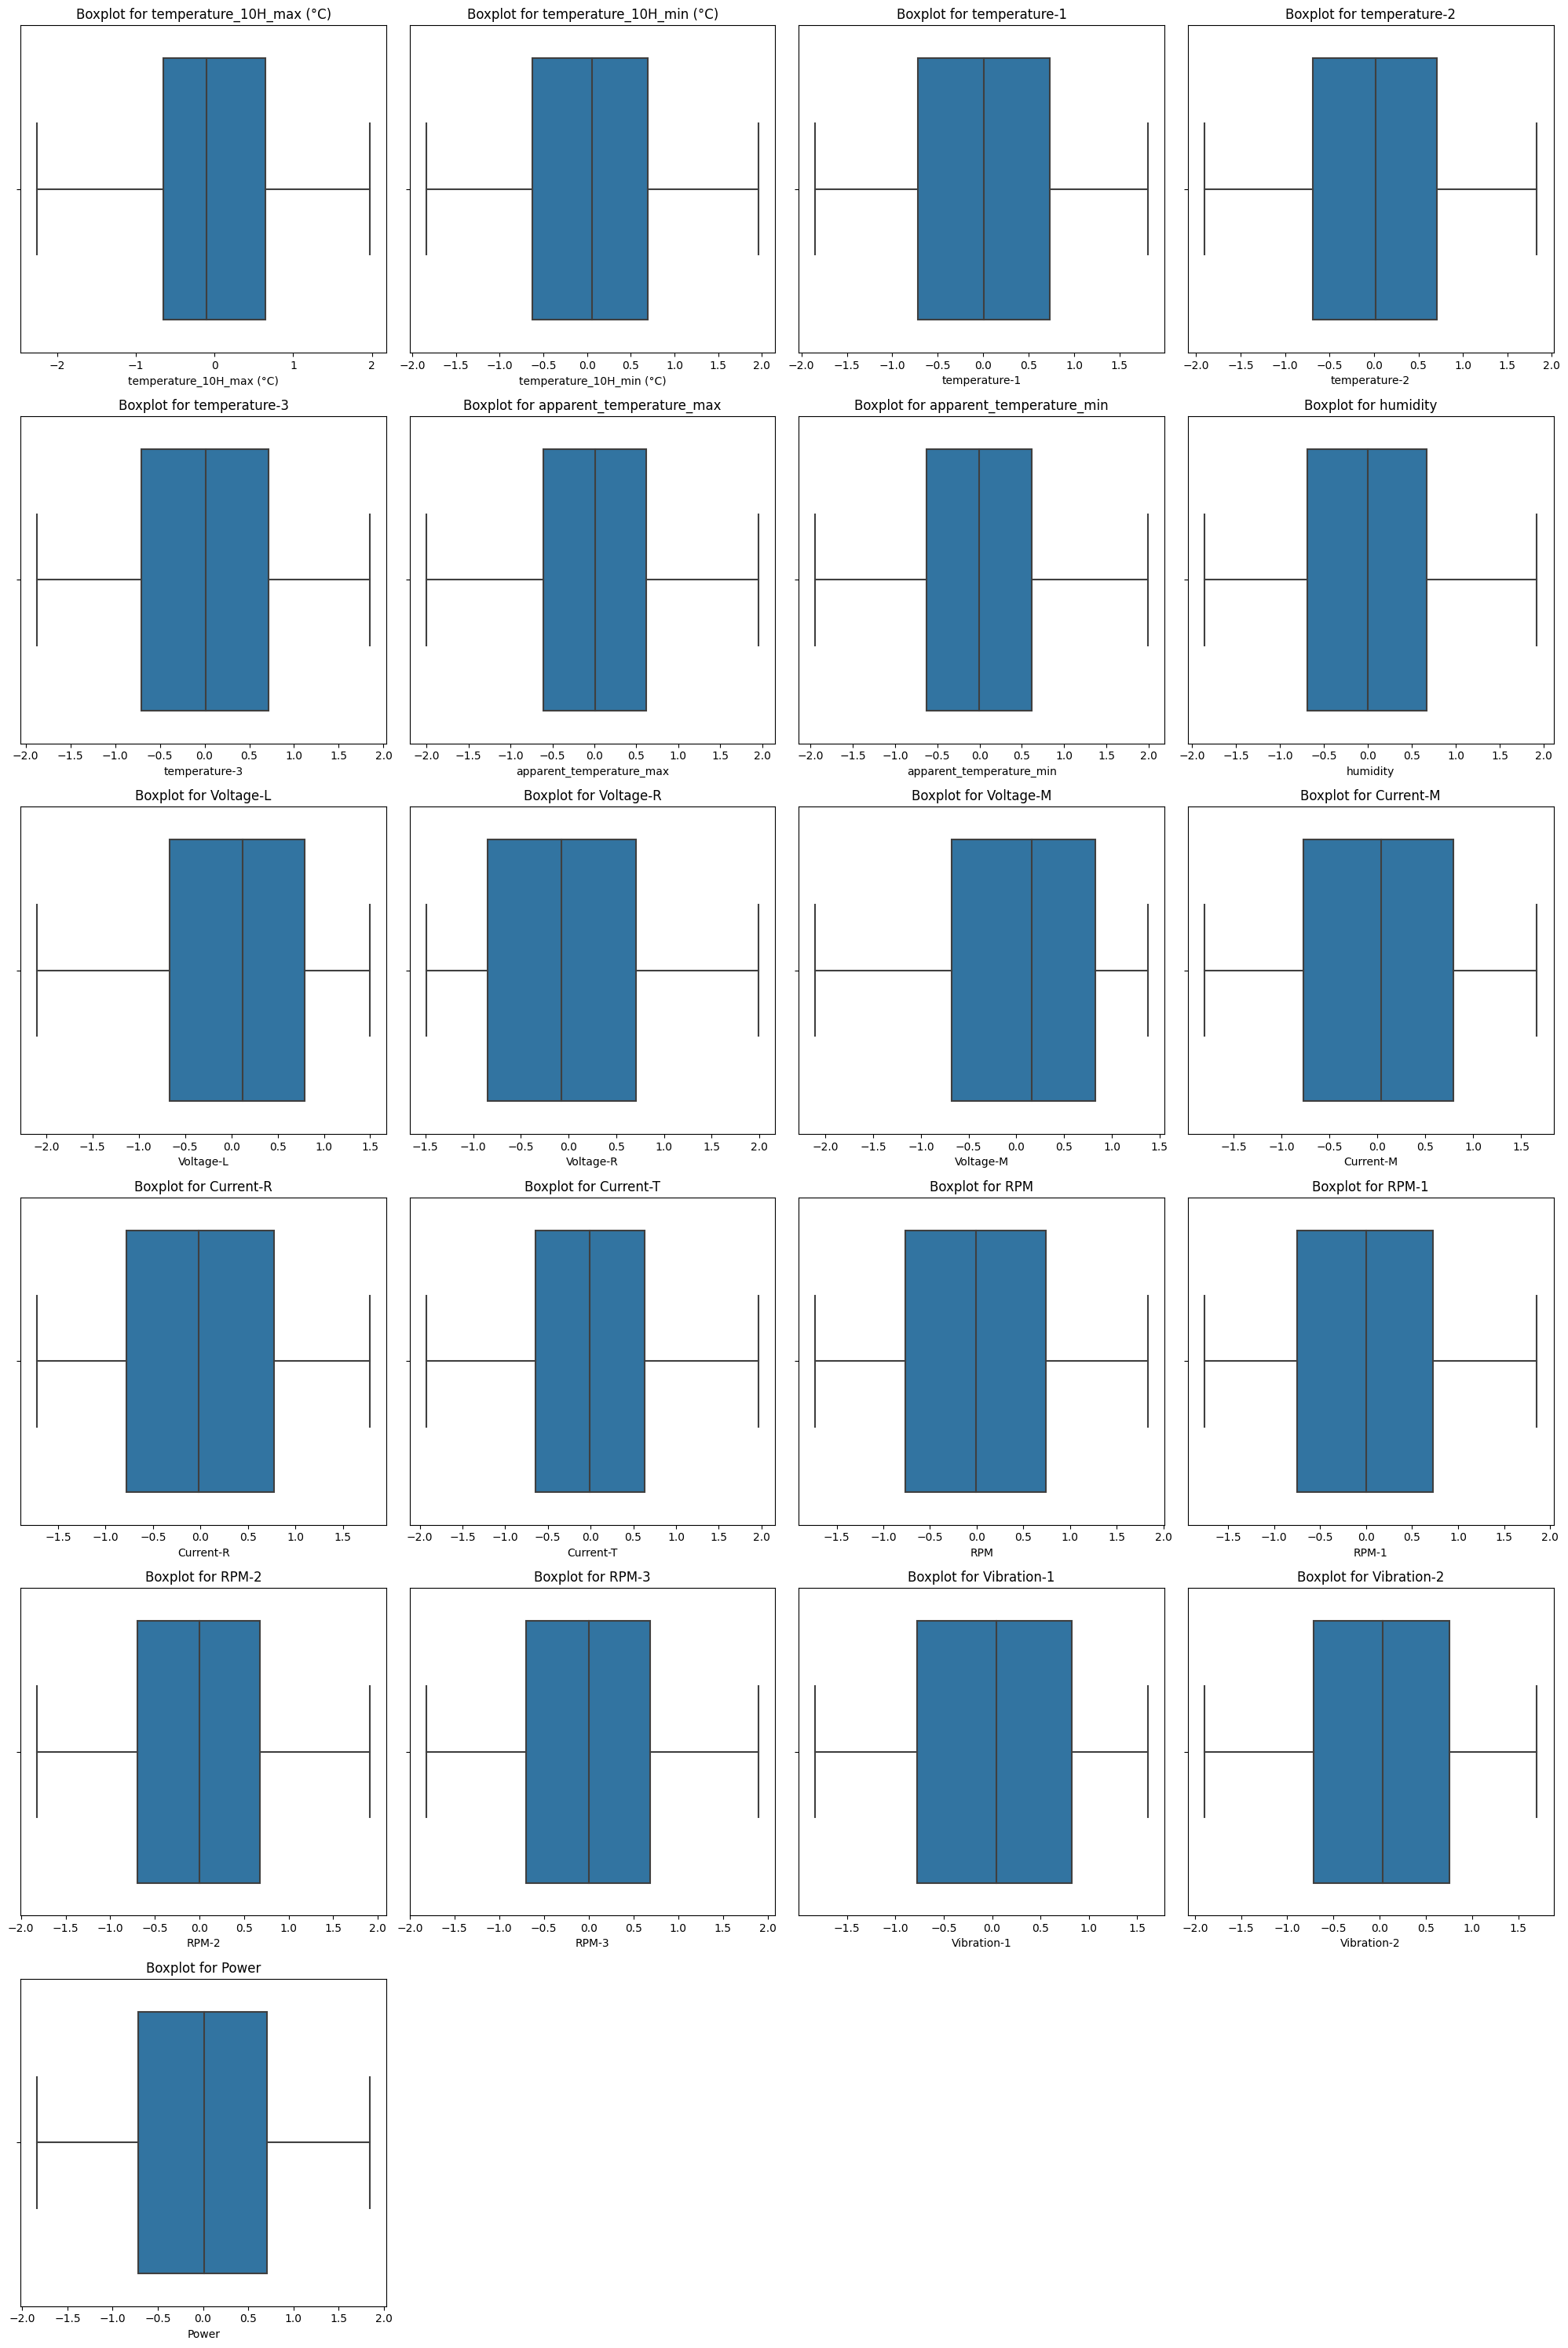

In [43]:
# Membuat ukuran figure agar cukup besar untuk menampilkan semua boxplot
plt.figure(figsize=(n_cols * 5, n_rows * 5))

# Membuat boxplot untuk setiap kolom numerik
for i, col in enumerate(numeric, 1):
    plt.subplot(n_rows, n_cols, i)  # Menyesuaikan jumlah baris dan kolom
    sns.boxplot(data=train[numeric], x=col)
    plt.title(f'Boxplot for {col}')

# Menyesuaikan tata letak agar tidak overlap
plt.tight_layout()

# Tampilkan plot
plt.show()

## **BUILD THE MODEL**

In [44]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = train.drop(columns=['Status'])  # Features
y = train['Status']                  # Target variable

# Split the data into training and testing sets
# Ensure you are passing both X and y to train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

LOGISTIC REGRESSION

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()

In [46]:
logistic_model = LogisticRegression(max_iter=2000,random_state=42)
logistic_model.fit(X_train,y_train)

LogisticRegression(max_iter=2000, random_state=42)

In [47]:
y_pred_logistic = logistic_model.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred_logistic)
print(f"Akurasi: {accuracy * 100:.2f}%")

Akurasi: 61.53%


In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

# Mengambil probabilitas untuk semua kelas
y_proba_logreg = logistic_model.predict_proba(X_test)

# Untuk menghitung AUC, kita perlu memilih probabilitas untuk semua kelas
roc_auc_logreg = roc_auc_score(y_test, y_proba_logreg, multi_class='ovr')

# Menghitung metrik lainnya
accuracy_logreg = accuracy_score(y_test, y_pred_logistic)
precision_logreg = precision_score(y_test, y_pred_logistic, average='weighted')
recall_logreg = recall_score(y_test, y_pred_logistic, average='weighted')
f1_logreg = f1_score(y_test, y_pred_logistic, average='weighted')  # Menambahkan F1 score

# Menyusun hasil ke dalam dictionary dan mengonversinya menjadi DataFrame
data = {
    'Accuracy': [accuracy_logreg],
    'Precision': [precision_logreg],
    'Recall': [recall_logreg],
    'F1 Score': [f1_logreg],  # Menambahkan F1 Score
    'ROC AUC': [roc_auc_logreg]
}

# Konversi dictionary menjadi DataFrame
df_results = pd.DataFrame(data, index=['Logistic Regression'])
df_results

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
# atau
from imblearn.under_sampling import RandomUnderSampler

# Menggunakan SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
from sklearn.model_selection import GridSearchCV

xgboost

In [50]:
import xgboost as xgb

# Membuat model XGBoost
model = xgb.XGBClassifier(
    base_score = 0.5,
    booster = 'gbtree',
    n_estimators = 100
)

In [51]:
# Melatih model dengan data pelatihan
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [52]:
# Memprediksi hasil dari data uji
y_pred_xgb = model.predict(X_test)

# Menghitung akurasi
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Akurasi: {accuracy * 100:.2f}%")

Akurasi: 61.53%


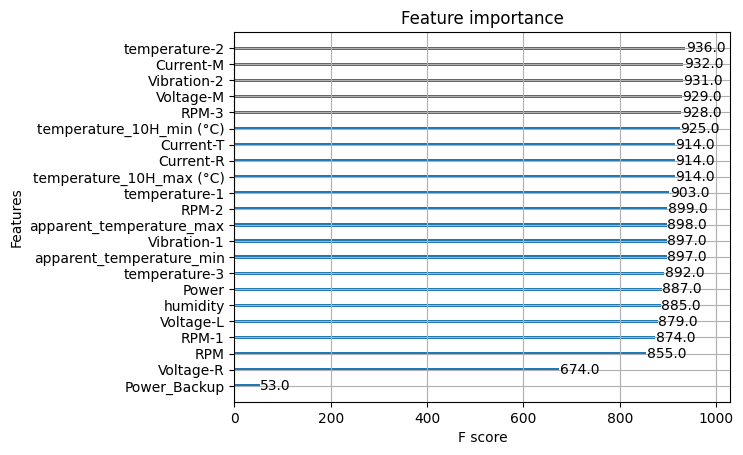

In [53]:
import matplotlib.pyplot as plt

# Plot fitur penting
xgb.plot_importance(model, importance_type='weight')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Grid search
xgb_model = XGBClassifier()
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Model terbaik
best_model = grid_search.best_estimator_
print(grid_search.best_params_)


Fully Connected Neural Networks (DEEP LEARNING)

In [ ]:
hehehehe

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [ ]:
from tensorflow.keras.utils import to_categorical

# Assume `y` contains raw integer labels (e.g., [0, 1, 2])
num_classes = 3  # Replace with the actual number of classes
y_train = to_categorical(y_train, num_classes)  # Convert to one-hot encoding
y_test = to_categorical(y_test, num_classes)


In [ ]:
num_classes = len(np.unique(y))  # Number of classes

model_FCNN = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dropout(0.3),  # Prevent overfitting
    Dense(64, activation='relu'),  # Hidden layer
    Dropout(0.3),
    Dense(num_classes, activation='softmax')  # Output layer for classification
])

In [ ]:
model_FCNN.compile(
    optimizer='adam',  # Adaptive optimizer
    loss='sparse_categorical_crossentropy',  # Suitable for multi-class classification
    metrics=['accuracy']  # Track accuracy during training
)

In [ ]:
dense_layer = tf.keras.layers.Dense(10)  # Instantiate the layer outside

@tf.function
def forward_pass(x):
    return dense_layer(x)


In [ ]:
print(X_train.shape)


In [ ]:
history = model_FCNN.fit(
    X_train, y_train,
    validation_split=0.2,  # Use part of training data for validation
    epochs=20,  # Number of training iterations
    batch_size=32,  # Number of samples per gradient update
    verbose=1  # Show progress
)

In [ ]:
# Example setup
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Dummy data
import numpy as np
num_classes = 3
batch_size = 64

# Input data
X = np.random.rand(batch_size * 5, 10)  # 160 samples, 10 features
y = np.random.randint(0, num_classes, size=(batch_size * 5,))  # Integer labels for 160 samples

# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model definition
model_fcnn = Sequential([
    Dense(64, activation='relu', input_shape=(10,)),  # Input shape matches the number of features
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # Output shape matches the number of classes
])

# Compile the model
model_fcnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model_fcnn.fit(X_train, y_train, epochs=50, batch_size=batch_size, verbose=1)

# Evaluate the model
loss, accuracy = model_fcnn.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")


In [68]:
import lightgbm as lgbm

lgbm = lgbm.LGBMClassifier()

In [69]:
lgbm.fit(X_train,y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032453 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5158
[LightGBM] [Info] Number of data points in the train set: 1040000, number of used features: 22
[LightGBM] [Info] Start training from score -1.664661
[LightGBM] [Info] Start training from score -0.485911
[LightGBM] [Info] Start training from score -1.631639


LGBMClassifier()

In [70]:
y_pred_lgbm = lgbm.predict(X_test)

In [73]:
# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred_lgbm)
print(f"Akurasi: {accuracy * 100:.2f}%")

Akurasi: 61.53%


In [74]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=8)


In [75]:
model_knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [ ]:
# Prediksi dengan data test
y_pred = model_knn.predict(X_test)

# Evaluasi akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy:.2f}")

## **PREDICTION**

In [54]:
test = pd.read_csv("/kaggle/input/penyisihan-data-vers-anava-19/test.csv")

NameError: name 'tes' is not defined

In [55]:
test.head(10)

,ID_Transaction,temperature_10H_max (°C),temperature_10H_min (°C),temperature-1,temperature-2,temperature-3,apparent_temperature_max,apparent_temperature_min,ID_Area,Machine,...,Current-R,Current-T,RPM,RPM-1,RPM-2,RPM-3,Vibration-1,Vibration-2,Power,Power_Backup
0,TRXb7e33ef41eea9cfdc0d1c338bad7f0d4,-3322.323689270587,-221.67737363254508,166.92240029876953,48.626852810394325,,13.669606291376748,-43.911656667645246,ID40,E.2,...,45.45096449466927,36.90041820578607,3917.2909495518606,2340.0981006961865,4035.8136205275036,3561.643315893858,26.94434125525892,57.225787489815936,1087.088944939074,Yes
1,TRX8fc5889e25fbf66b21063d165228745f,719.7003653439261,,400.6785384009253,14.421424505461966,53.74034236398276,22.297931907382534,-36.56915185752349,ID15,H.2,...,56.99476161118598,38.21020857831081,2762.899180916612,2952.383868264757,2791.328126140899,2623.0055374559884,23.513568935713902,55.34152829946722,,Yes
2,TRX5c56664724a974cf6c87bd2659fd7046,718.9186302101944,23.645588046264507,456.53520634624607,39.05399931897624,16.80005616247519,24.194077862441496,-19.18018123984545,ID20,I.4,...,53.15688509690868,44.19762799103777,3927.7998823136522,4032.620018624474,3080.0855020077333,4035.6381798818416,19.985904585201382,44.38657282139394,1524.9192199359206,Yes
3,TRX85fe42a5737897b7649a24fede27e90f,593.6787089846632,19.380102911302785,,7.974227880557866,118.6299667272738,14.245904945513926,,ID41,J.2,...,49.02472557765421,41.50724029958459,2886.27576356171,2991.885544406123,3679.9557779321217,2500.7648454729942,21.777422610733986,50.73568095561177,469.72530260126604,Yes
4,TRX16fae83f3c8c66fb15f088e7da7713ee,644.1194850220021,27.35261595938096,628.3354270324296,56.588644499962506,5.29817421109406,31.684072124234657,-24.18266108399551,ID22,H.1,...,45.04135681731117,57.0080395875073,4265.69854480477,,4855.27304747384,3371.633256175032,27.061249402750484,52.31777032673014,1325.416707655282,No
5,TRX9380e0a12998e8ecd6bb59f25858b98f,409.2611642156225,8.831767540127805,113.66298232653247,26.504431240923527,109.4921094289822,11.734024980624937,-5.255982572574974,ID8,K.2,...,57.0887156886232,45.45780899155126,3125.812967503427,2610.368966480576,2613.796499485198,5446.410688530854,24.45460616394322,46.918298510601566,1004.4715823715816,Yes
6,TRX16d58ebb1fa03a228754de48d64f276c,183.41195902685615,-58.14738785363565,229.05119870813417,7.459121029811401,86.69104969034493,5.086925743508547,-24.246740325829315,ID13,B.4,...,47.561464953285615,46.07501921545834,3202.873923447278,4045.2699342669503,3452.8020369159635,,22.95752347427934,58.74984176064348,931.2138960655068,Yes
7,TRXd8ac5b44f6c6e8fac295cc63880bc7da,823.2431872486703,29.139672807242395,401.7175892509523,29.356684283054825,95.31654084152088,29.899817988694817,-26.790720103630207,ID11,F.2,...,54.59260585391873,45.139347142720425,4766.8915786627695,3145.854471867054,,2883.773147464829,27.93807339048427,46.58196669325162,326.8176144761714,No
8,TRX67c411a3b6f562576a949388fd18b733,1186.3610366952178,11.072132804185085,202.19958050455313,15.113041795560328,89.78692012433669,37.02770065261625,-26.25445598758912,ID11,D.2,...,51.405562243452806,49.54539126164451,3888.816065109426,4851.754685153951,2622.844734574225,4456.946522925455,29.30765733428205,49.97274363746737,475.6462997683567,Yes
9,TRX7c52c716c2b4c8dce05fe10d19d92273,744.7222776371461,-194.0609581180155,183.00382113502593,21.806449701476662,,30.600748115427717,-35.32918935023903,ID29,D.4,...,44.268042856297264,62.54839303620949,4677.058324040984,3779.14299831284,2842.894370055151,4512.703213291585,21.43282878994165,55.62922088756218,1112.840841548214,No


In [56]:
test.dtypes

ID_Transaction              object
temperature_10H_max (°C)    object
temperature_10H_min (°C)    object
temperature-1               object
temperature-2               object
temperature-3               object
apparent_temperature_max    object
apparent_temperature_min    object
ID_Area                     object
Machine                     object
timestamp                   object
humidity                    object
Voltage-L                   object
Voltage-R                   object
Voltage-M                   object
Current-M                   object
Current-R                   object
Current-T                   object
RPM                         object
RPM-1                       object
RPM-2                       object
RPM-3                       object
Vibration-1                 object
Vibration-2                 object
Power                       object
Power_Backup                object
dtype: object

In [64]:
test['Power_Backup'] = encoder.fit_transform(test['Power_Backup'])

In [59]:
test = test.drop(columns=['ID_Transaction','ID_Area','Machine','timestamp'])

In [65]:
test.head(10)

,temperature_10H_max (°C),temperature_10H_min (°C),temperature-1,temperature-2,temperature-3,apparent_temperature_max,apparent_temperature_min,humidity,Voltage-L,Voltage-R,...,Current-R,Current-T,RPM,RPM-1,RPM-2,RPM-3,Vibration-1,Vibration-2,Power,Power_Backup
0,-3322.323689270587,-221.67737363254508,166.92240029876953,48.626852810394325,,13.669606291376748,-43.911656667645246,33.92020930491544,431.0828752945945,334.4336442733389,...,45.45096449466927,36.90041820578607,3917.2909495518606,2340.0981006961865,4035.8136205275036,3561.643315893858,26.94434125525892,57.225787489815936,1087.088944939074,2
1,719.7003653439261,,400.6785384009253,14.421424505461966,53.74034236398276,22.297931907382534,-36.56915185752349,38.730079002214595,430.86907091879374,276.42902574932094,...,56.99476161118598,38.21020857831081,2762.899180916612,2952.383868264757,2791.328126140899,2623.0055374559884,23.513568935713902,55.34152829946722,,2
2,718.9186302101944,23.645588046264507,456.53520634624607,39.05399931897624,16.80005616247519,24.194077862441496,-19.18018123984545,32.308272904032854,427.47900119214654,289.65447865629426,...,53.15688509690868,44.19762799103777,3927.7998823136522,4032.620018624474,3080.0855020077333,4035.6381798818416,19.985904585201382,44.38657282139394,1524.9192199359206,2
3,593.6787089846632,19.380102911302785,,7.974227880557866,118.6299667272738,14.245904945513926,,28.081321185053888,431.50495422339134,307.93724726649396,...,49.02472557765421,41.50724029958459,2886.27576356171,2991.885544406123,3679.9557779321217,2500.7648454729942,21.777422610733986,50.73568095561177,469.72530260126604,2
4,644.1194850220021,27.35261595938096,628.3354270324296,56.588644499962506,5.29817421109406,31.684072124234657,-24.18266108399551,33.968449827994434,406.82034396548465,261.9734895935891,...,45.04135681731117,57.0080395875073,4265.69854480477,,4855.27304747384,3371.633256175032,27.061249402750484,52.31777032673014,1325.416707655282,1
5,409.2611642156225,8.831767540127805,113.66298232653247,26.504431240923527,109.4921094289822,11.734024980624937,-5.255982572574974,41.69754385765057,430.71977837255014,298.1738008711356,...,57.0887156886232,45.45780899155126,3125.812967503427,2610.368966480576,2613.796499485198,5446.410688530854,24.45460616394322,46.918298510601566,1004.4715823715816,2
6,183.41195902685615,-58.14738785363565,229.05119870813417,7.459121029811401,86.69104969034493,5.086925743508547,-24.246740325829315,44.822654526920424,442.3067496024657,317.84215305593875,...,47.561464953285615,46.07501921545834,3202.873923447278,4045.2699342669503,3452.8020369159635,,22.95752347427934,58.74984176064348,931.2138960655068,2
7,823.2431872486703,29.139672807242395,401.7175892509523,29.356684283054825,95.31654084152088,29.899817988694817,-26.790720103630207,33.58506753502873,425.24283092305484,276.1603414283991,...,54.59260585391873,45.139347142720425,4766.8915786627695,3145.854471867054,,2883.773147464829,27.93807339048427,46.58196669325162,326.8176144761714,1
8,1186.3610366952178,11.072132804185085,202.19958050455313,15.113041795560328,89.78692012433669,37.02770065261625,-26.25445598758912,41.942613803717805,431.7667965638464,283.46925141993796,...,51.405562243452806,49.54539126164451,3888.816065109426,4851.754685153951,2622.844734574225,4456.946522925455,29.30765733428205,49.97274363746737,475.6462997683567,2
9,744.7222776371461,-194.0609581180155,183.00382113502593,21.806449701476662,,30.600748115427717,-35.32918935023903,33.14986496078241,,278.9610991516215,...,44.268042856297264,62.54839303620949,4677.058324040984,3779.14299831284,2842.894370055151,4512.703213291585,21.43282878994165,55.62922088756218,1112.840841548214,1
